## Table of Contents
- [Data Wrangling and Cleaning](#data)
- [Data Analysis](#analysis)
- [Genre vs. Global & Regional Sales](#genre)
- [Year vs. Sales Region](#year)
- [Publisher vs. Sales Region](#publisher)
- [Platform vs. Sales Region](#platform)
- [Statistical Analysis for Action Genre Across Regions](#action)
- [Statistical Analysis for Publishers Across Regions](#publishers)
- [Statistical Analysis for Platforms Across Regions](#platforms)

<a id='data'></a>
## Data Wrangling and Cleaning

In [1]:
# Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import scipy.stats as stats

# Hide All Warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Dataset
vgsales = pd.read_csv('vgsales.csv')

In [3]:
# View first few rows
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
# View last few rows
vgsales.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [5]:
# Find the number of rows and columns
vgsales.shape

(16598, 11)

In [6]:
# Inspect and insure data types are correct and that their is no missing data.
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
# Description of the data in the dataset.
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
# Copy the dataset for cleaning
vgsales_cleaned = vgsales.copy()

In [9]:
# Check the amount of null values in the "Year" and "Publisher" columns
year_null_values = vgsales_cleaned['Year'].isnull().sum()
print(f'Number of missing values in Year column: {year_null_values}')
publisher_null_values = vgsales_cleaned['Publisher'].isnull().sum()
print(f'Number of missing values in Publisher column: {publisher_null_values}')

Number of missing values in Year column: 271
Number of missing values in Publisher column: 58


In [10]:
# Since the amount of null values is insignificant we will just drop these rows.
vgsales_cleaned = vgsales.dropna(subset=['Year', 'Publisher'])

In [11]:
# Check the amount of null values in the "Year" and "Publisher" columns after cleaning
year_null_values_2 = vgsales_cleaned['Year'].isnull().sum()
print(f'Number of missing values in Year column: {year_null_values_2}')
publisher_null_values_2 = vgsales_cleaned['Publisher'].isnull().sum()
print(f'Number of missing values in Publisher column: {publisher_null_values_2}')

Number of missing values in Year column: 0
Number of missing values in Publisher column: 0


In [12]:
# Round the "Year" column and convert it to integers
vgsales_cleaned['Year'] = vgsales_cleaned['Year'].round().astype(int)

In [13]:
# Reinspect Dataset
vgsales_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int32  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


In [14]:
# Description of the data in the dataset.
vgsales_cleaned.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


<a id='analysis'></a>
## Data Analysis

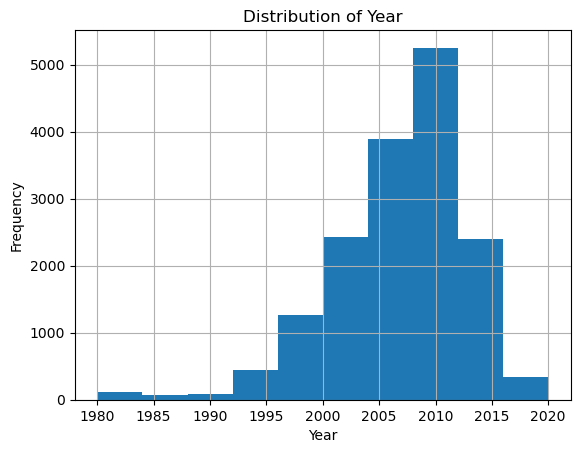

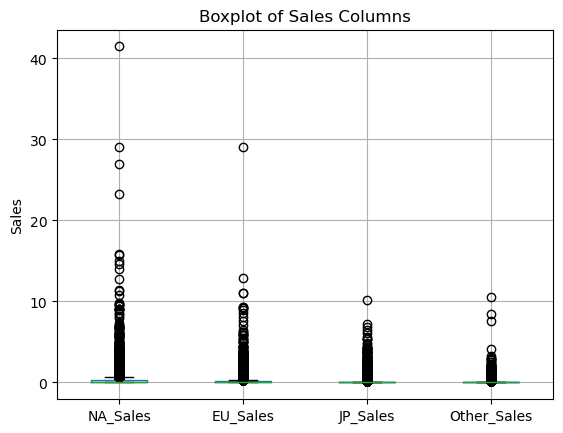

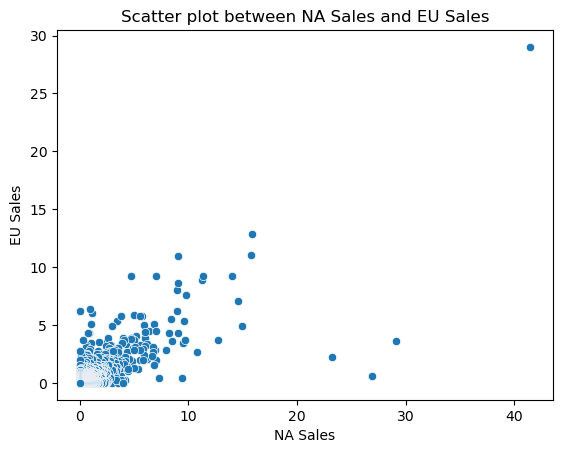

In [15]:
# Histogram of Year column
vgsales_cleaned['Year'].hist()
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

# Boxplot of sales columns
sales_columns = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
vgsales_cleaned[sales_columns].boxplot()
plt.title('Boxplot of Sales Columns')
plt.ylabel('Sales')
plt.show()

# Scatter plot between NA Sales and EU Sales
sns.scatterplot(x='NA_Sales', y='EU_Sales', data=vgsales_cleaned)
plt.title('Scatter plot between NA Sales and EU Sales')
plt.xlabel('NA Sales')
plt.ylabel('EU Sales')
plt.show()

In [16]:
# Define features and target variable
features = vgsales_cleaned[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Year']]
target = vgsales_cleaned['Global_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Build a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0206047193319206


<a id='genre'></a>
## Genre vs Global & Regional Sales

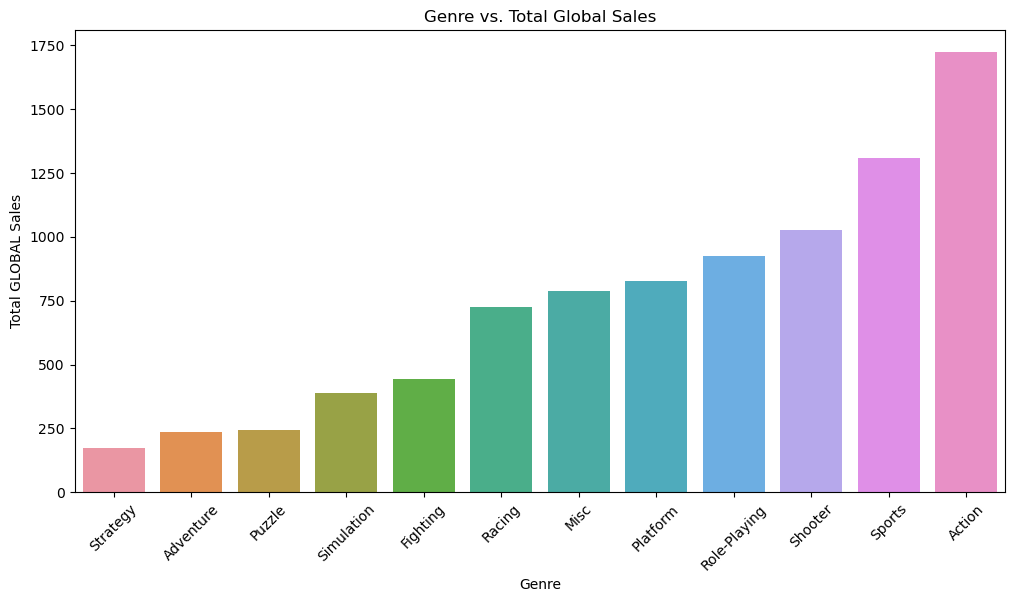

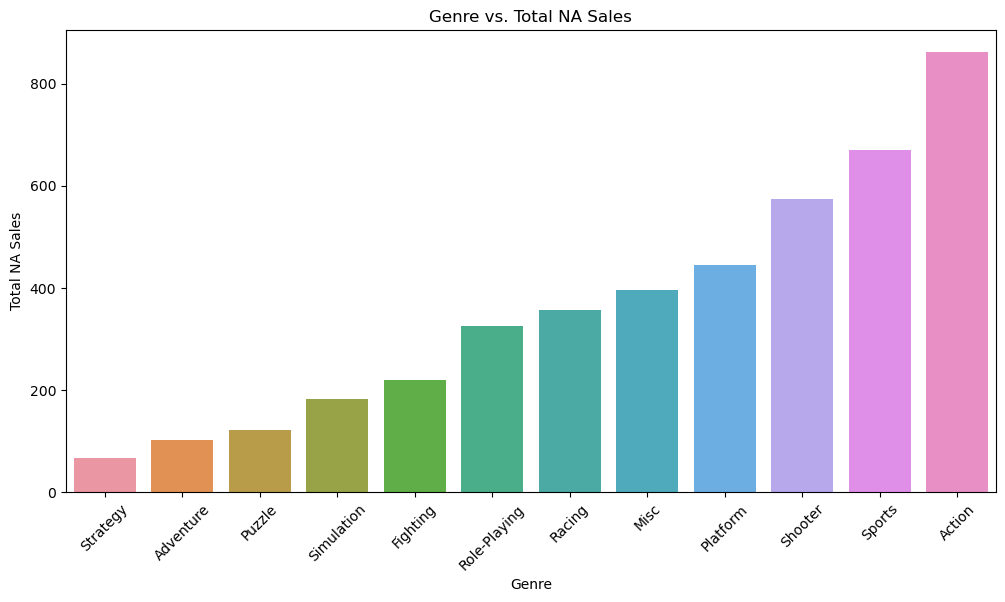

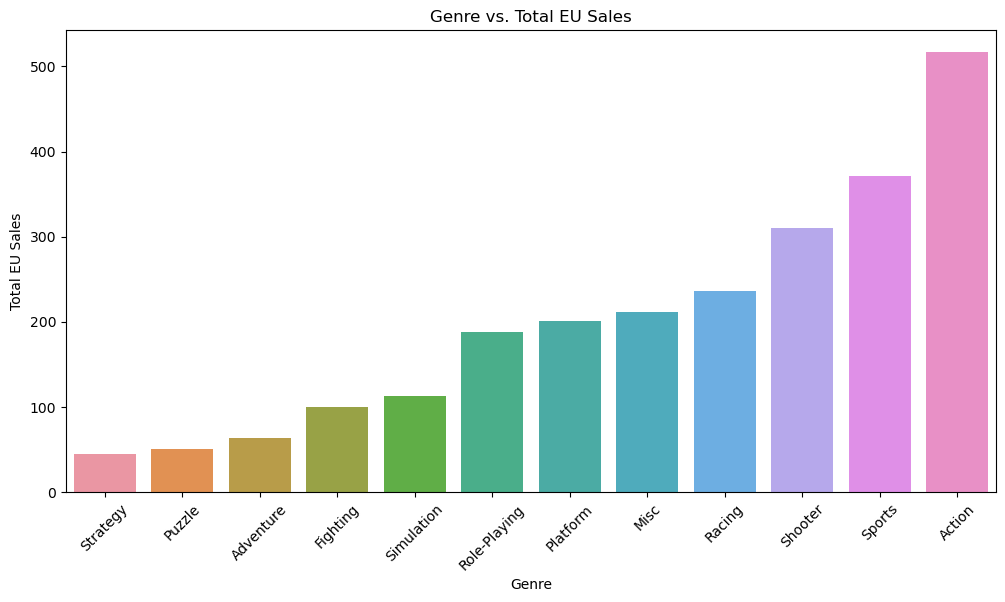

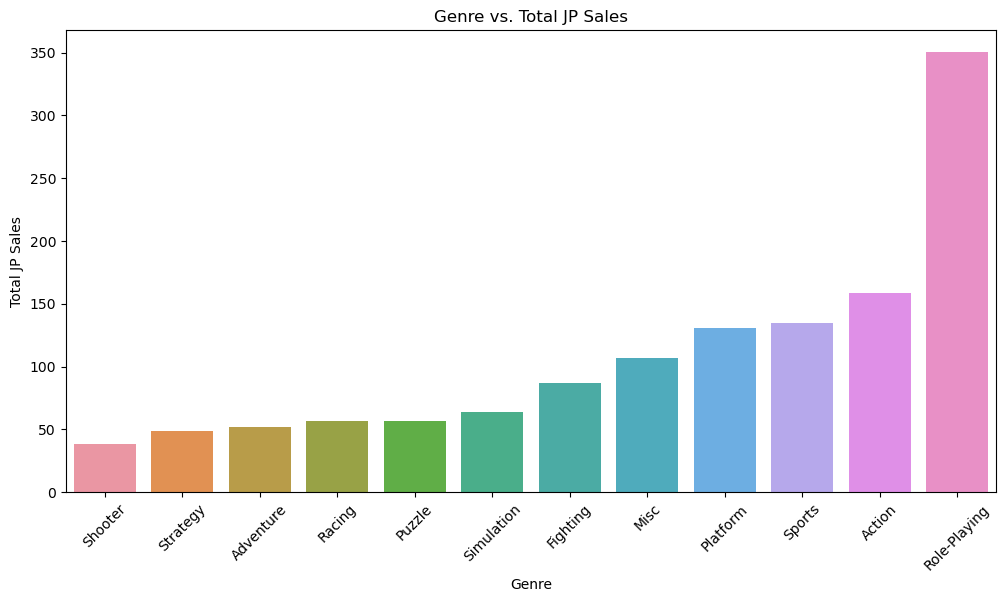

In [17]:
# Bar plot of genre vs. Global & Regional Sales
def plot_genre_sales(sales_data, title):
    genre_sales = vgsales_cleaned.groupby('Genre')[sales_data].sum().sort_values()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=genre_sales.index, y=genre_sales.values)
    plt.title(title)
    plt.xlabel('Genre')
    plt.ylabel('Total ' + sales_data.split('_')[0].upper() + ' Sales')
    plt.xticks(rotation=45)
    plt.show()

plot_genre_sales('Global_Sales', 'Genre vs. Total Global Sales')
plot_genre_sales('NA_Sales', 'Genre vs. Total NA Sales')
plot_genre_sales('EU_Sales', 'Genre vs. Total EU Sales')
plot_genre_sales('JP_Sales', 'Genre vs. Total JP Sales')

<a id='year'></a>
## Year vs. Sales Region

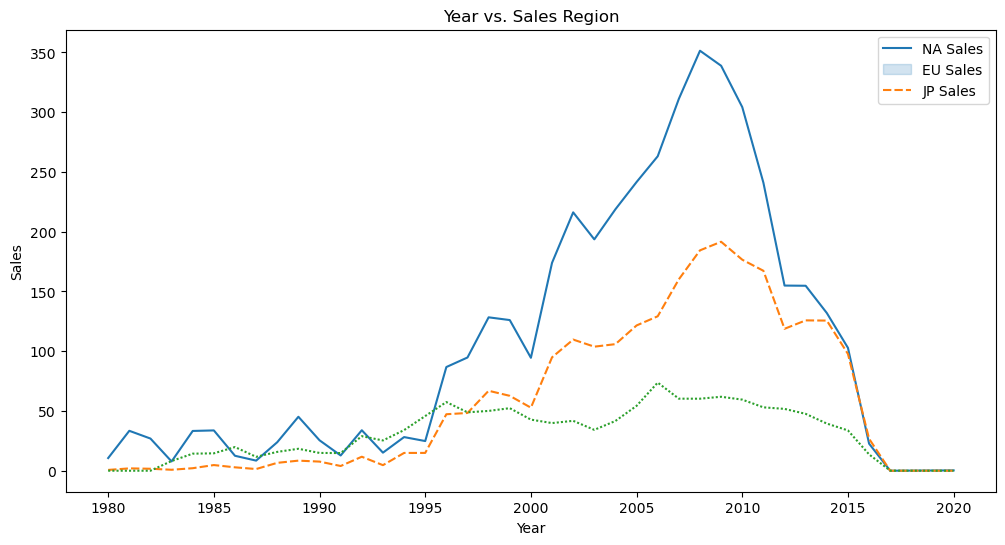

In [18]:
# Line plot of year vs. sales region (NA_Sales, EU_Sales, JP_Sales)
plt.figure(figsize=(12, 6))
sns.lineplot(data=vgsales_cleaned.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum())
plt.title('Year vs. Sales Region')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(['NA Sales', 'EU Sales', 'JP Sales'])
plt.show()

<a id='publisher'></a>
## Publisher vs. Sales Region

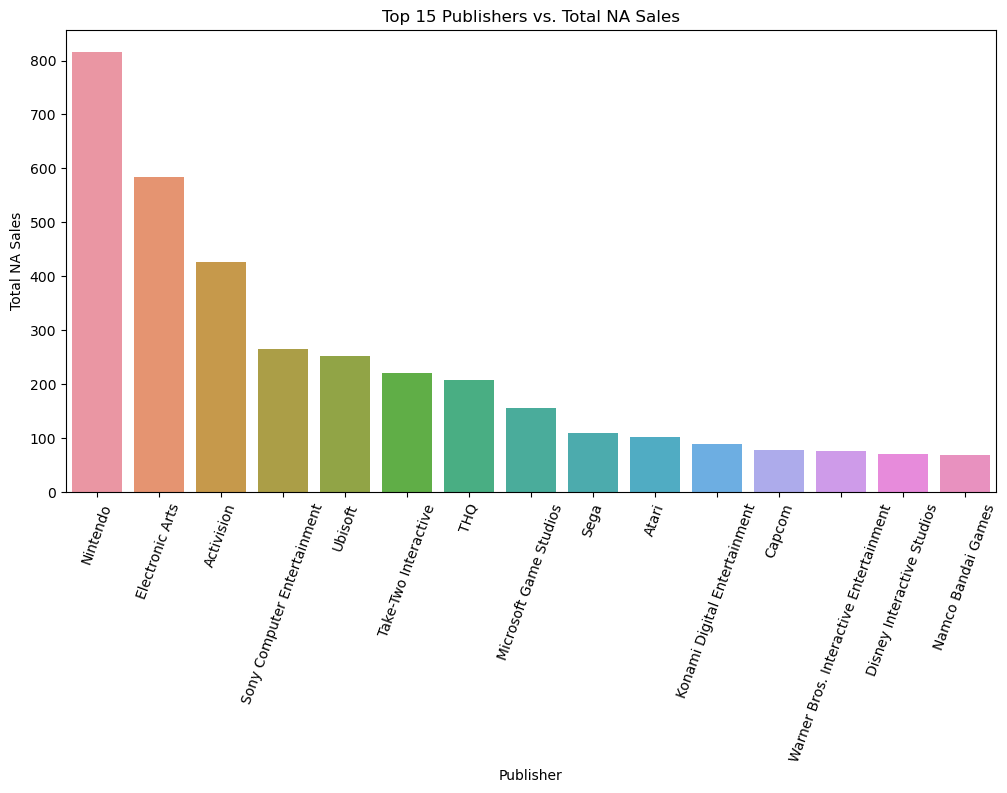

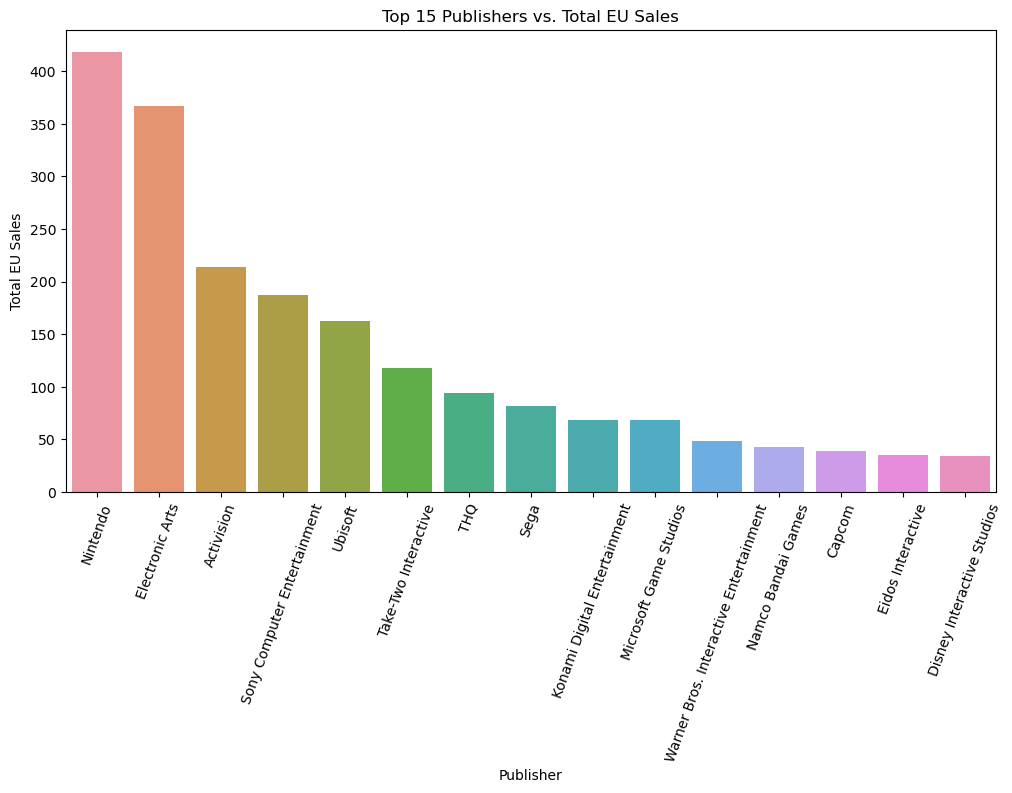

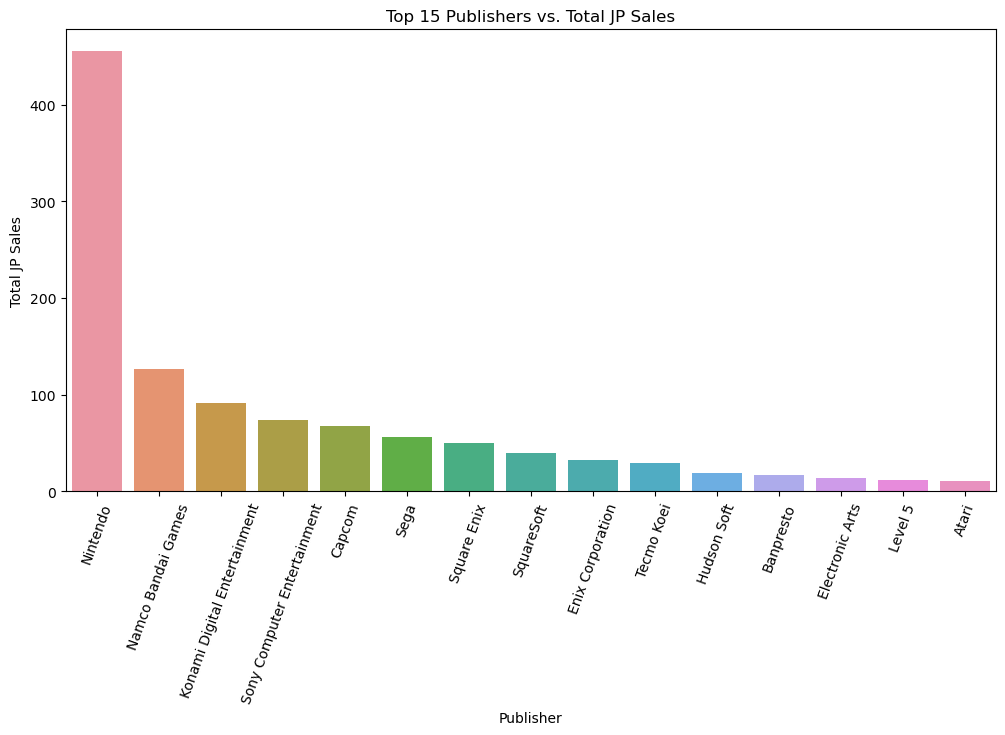

In [19]:
# Bar plot of top 15 publishers vs. regional sales
def plot_top_publishers_sales(sales_column, title):
    top_publishers = vgsales_cleaned.groupby('Publisher')[sales_column].sum().sort_values(ascending=False)
    top_publishers_top15 = top_publishers.head(15)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_publishers_top15.index, y=top_publishers_top15.values)
    plt.title(title)
    plt.xlabel('Publisher')
    plt.ylabel('Total ' + sales_column.split('_')[0].upper() + ' Sales')
    plt.xticks(rotation=70)
    plt.show()

plot_top_publishers_sales('NA_Sales', 'Top 15 Publishers vs. Total NA Sales')
plot_top_publishers_sales('EU_Sales', 'Top 15 Publishers vs. Total EU Sales')
plot_top_publishers_sales('JP_Sales', 'Top 15 Publishers vs. Total JP Sales')

<a id='platform'></a>
##  Platform vs. Sales Region

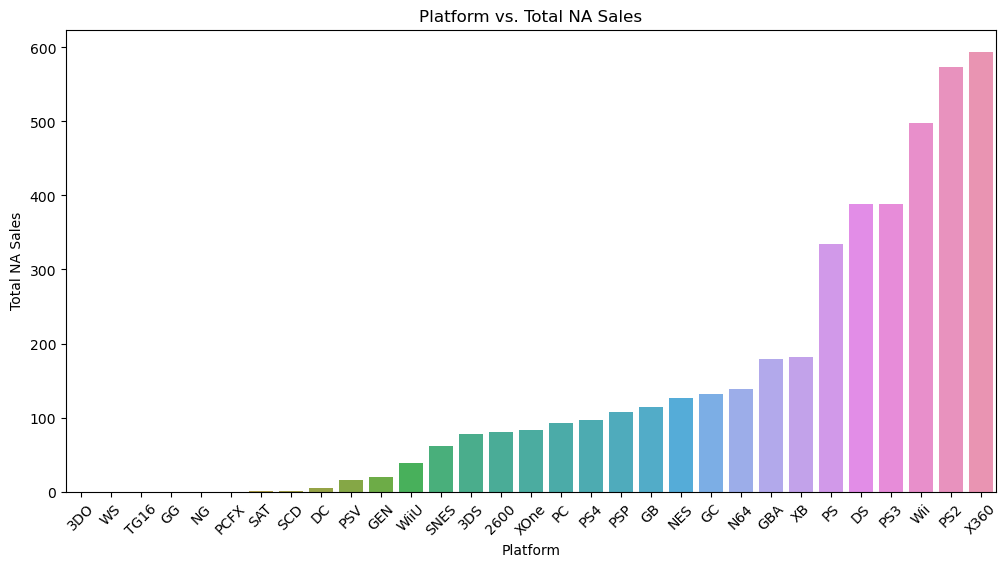

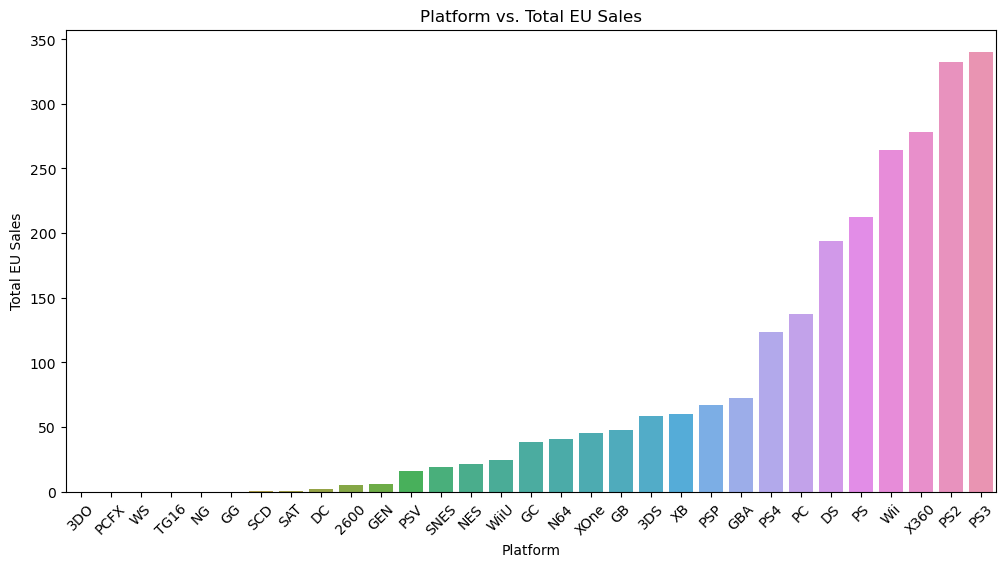

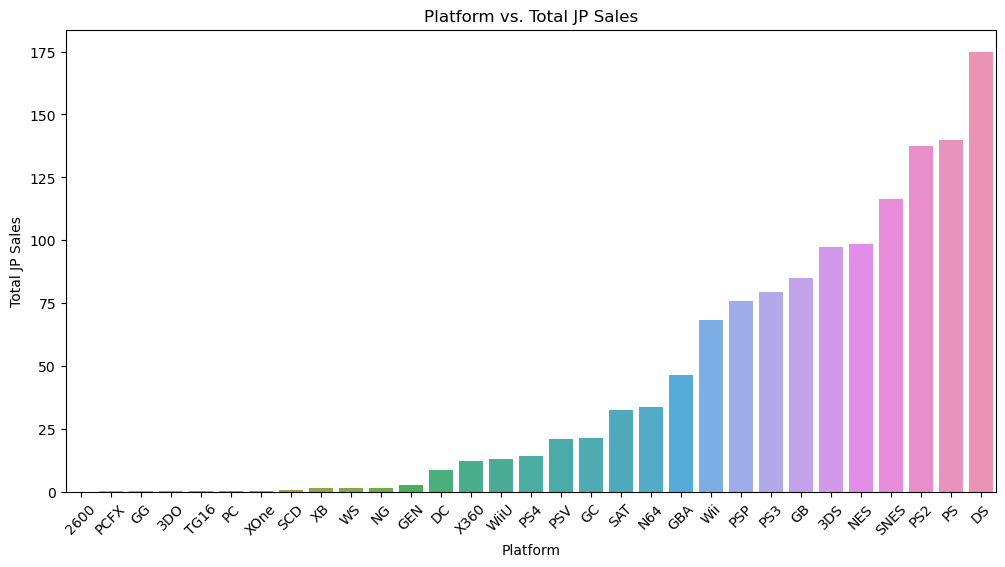

In [20]:
# Bar plot of platform vs. regional sales
def plot_platform_sales(sales_column, title):
    platform_sales = vgsales_cleaned.groupby('Platform')[sales_column].sum().sort_values()
    plt.figure(figsize=(12, 6))
    sns.barplot(x=platform_sales.index, y=platform_sales.values)
    plt.title(title)
    plt.xlabel('Platform')
    plt.ylabel('Total ' + sales_column.split('_')[0].upper() + ' Sales')
    plt.xticks(rotation=45)
    plt.show()

plot_platform_sales('NA_Sales', 'Platform vs. Total NA Sales')
plot_platform_sales('EU_Sales', 'Platform vs. Total EU Sales')
plot_platform_sales('JP_Sales', 'Platform vs. Total JP Sales')

<a id='action'></a>
## Statistical Analysis for Action Genre Across Regions

In [21]:
# Statistical Analysis for Action Genre Across Regions
def perform_sales_comparison(data, region, sales_column1, sales_column2):
    t_stat, p_value = stats.ttest_ind(data[sales_column1], data[sales_column2])
    print(f"Comparison of Sales between {region} for {sales_column1.split('_')[0].upper()} and {sales_column2.split('_')[0].upper()}:")
    print("T-statistic:", t_stat)
    print("P-value:", p_value)
    print()

# Subset the data for Action genre
action_sales = vgsales[vgsales['Genre'] == 'Action']
perform_sales_comparison(action_sales, 'Action Genre', 'NA_Sales', 'EU_Sales')
perform_sales_comparison(action_sales, 'Action Genre', 'NA_Sales', 'JP_Sales')
perform_sales_comparison(action_sales, 'Action Genre', 'EU_Sales', 'JP_Sales')

Comparison of Sales between Action Genre for NA and EU:
T-statistic: 8.77675736148825
P-value: 2.1129534291944e-18

Comparison of Sales between Action Genre for NA and JP:
T-statistic: 21.116490971849043
P-value: 7.590384980609329e-96

Comparison of Sales between Action Genre for EU and JP:
T-statistic: 14.42383829260818
P-value: 1.840614421008153e-46



<a id='publishers'></a>
## Statistical Analysis for Publishers Across Regions

In [22]:
# Statistical Analysis for Publishers Across Regions
def perform_publisher_comparison(data, region, publishers, sales_column):
    sales_data = [data[data['Publisher'] == publisher][sales_column] for publisher in publishers]
    f_stat, p_value = stats.f_oneway(*sales_data)
    print(f"Comparison of Sales between Top Publishers in {region}:")
    print("F-statistic:", f_stat)
    print("P-value:", p_value)
    print()

# Subset the data for the top publishers in each region
na_publishers = ['Nintendo', 'Electronic Arts', 'Activision']
eu_publishers = ['Nintendo', 'Electronic Arts', 'Activision']
jp_publishers = ['Nintendo', 'Namco Bandai Games', 'Konami Digital Entertainment']
perform_publisher_comparison(vgsales, 'NA', na_publishers, 'NA_Sales')
perform_publisher_comparison(vgsales, 'EU', eu_publishers, 'EU_Sales')
perform_publisher_comparison(vgsales, 'JP', jp_publishers, 'JP_Sales')

Comparison of Sales between Top Publishers in NA:
F-statistic: 57.40901936384362
P-value: 3.3803417518723048e-25

Comparison of Sales between Top Publishers in EU:
F-statistic: 34.469798399552474
P-value: 1.5773828233946234e-15

Comparison of Sales between Top Publishers in JP:
F-statistic: 197.28271192187242
P-value: 3.3638973257641887e-80



<a id='platforms'></a>
## Statistical Analysis for Platforms Across Regions

In [23]:
# Statistical Analysis for Platforms Across Regions
def perform_platform_comparison(data, region, platforms, sales_column):
    sales_data = [data[data['Platform'] == platform][sales_column] for platform in platforms]
    f_stat, p_value = stats.f_oneway(*sales_data)
    print(f"Comparison of Sales between Top Platforms in {region}:")
    print("F-statistic:", f_stat)
    print("P-value:", p_value)
    print()

# Subset the data for the top platforms in each region
na_platforms = ['X360', 'PS2', 'Wii']
eu_platforms = ['PS3', 'PS2', 'X360']
jp_platforms = ['DS', 'PS', 'PS2']
perform_platform_comparison(vgsales, 'NA', na_platforms, 'NA_Sales')
perform_platform_comparison(vgsales, 'EU', eu_platforms, 'EU_Sales')
perform_platform_comparison(vgsales, 'JP', jp_platforms, 'JP_Sales')

Comparison of Sales between Top Platforms in NA:
F-statistic: 15.942212922362598
P-value: 1.2575595312588582e-07

Comparison of Sales between Top Platforms in EU:
F-statistic: 20.504793842821364
P-value: 1.3585854385526925e-09

Comparison of Sales between Top Platforms in JP:
F-statistic: 10.856837637038815
P-value: 1.9687463582561725e-05

